1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?


In [73]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') #gives white background
%matplotlib inline


In [3]:
import pandas_datareader.data as web

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list =['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()
start= datetime(end.year-1, end.month,end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

In [9]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-03-05,177.740005,174.520004,175.210007,176.820007,28401400.0,174.167923
2018-03-06,178.250000,176.130005,177.910004,176.669998,23788500.0,174.020172
2018-03-07,175.850006,174.270004,174.940002,175.029999,31703500.0,172.404770
2018-03-08,177.119995,175.070007,175.479996,176.940002,23774100.0,174.286118
2018-03-09,180.000000,177.389999,177.960007,179.979996,32185200.0,177.280518


In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,189.562112,185.826813,187.694303,187.699522,3.271160e+07,186.065981
std,22.267717,21.992890,22.129085,22.151893,1.415589e+07,21.935184
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,173.044998,169.800003,171.449997,171.004997,2.288735e+07,170.214981
50%,187.399994,184.940002,186.289993,186.050003,2.936840e+07,184.223236
75%,209.375000,205.784996,207.320000,207.760002,3.907040e+07,205.900421
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-03-05 to 2019-03-04
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


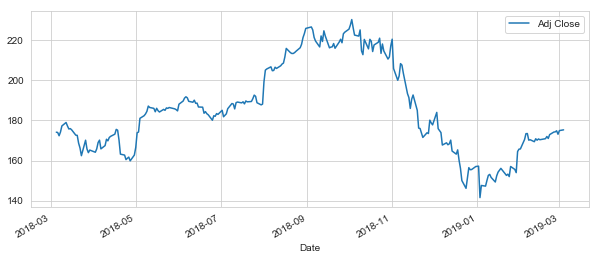

In [12]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

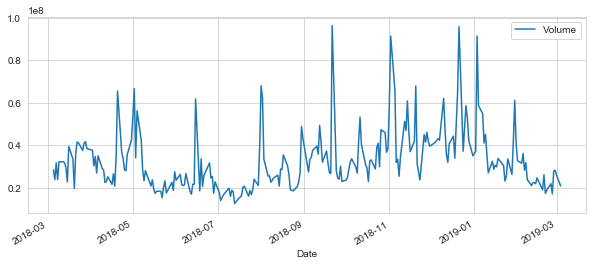

In [13]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [14]:
# moving Average

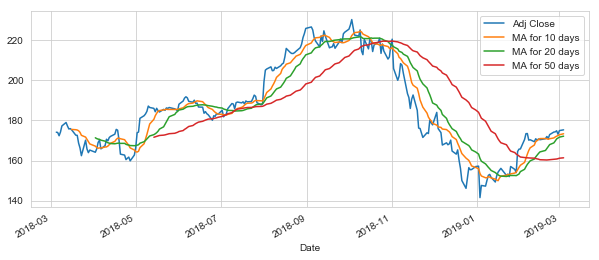

In [15]:
ma_day= [10,20,50]
for ma in ma_day:
    column_name= 'MA for %s days'%(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(window=ma).mean()
    
    

AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

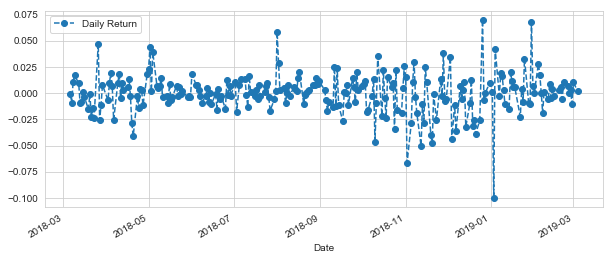

In [16]:
#Daily Returns
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# wecould use AAPL['Open']- AAPL['Close']
AAPL['Daily Return'].plot(legend = True, figsize=(10,4), linestyle ='--', Marker='o')

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


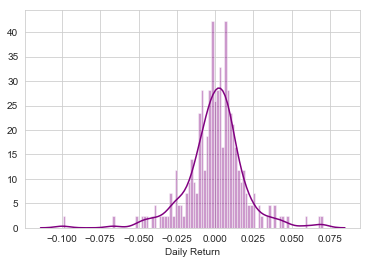

In [17]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

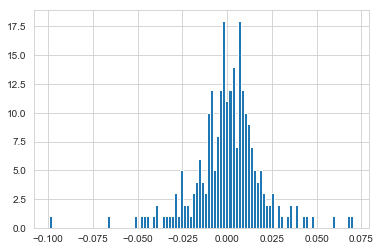

In [18]:
AAPL['Daily Return'].hist(bins=100)

In [19]:
closing_df = web.DataReader(tech_list,'yahoo',start,end)['Adj Close']

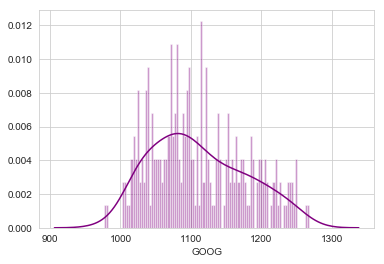

In [20]:
sns.distplot(closing_df['GOOG'],bins=100,color='purple')

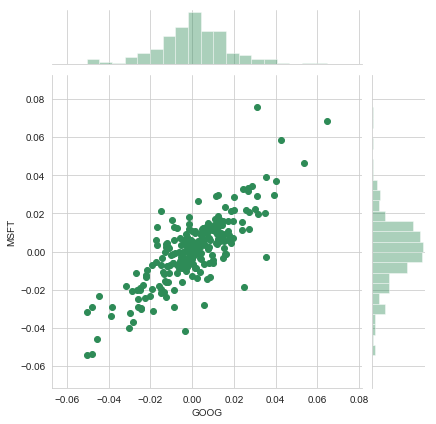

In [21]:
tech_returns = closing_df.pct_change()
tech_returns

sns.jointplot('GOOG','MSFT',tech_returns,kind='scatter',color='seagreen')

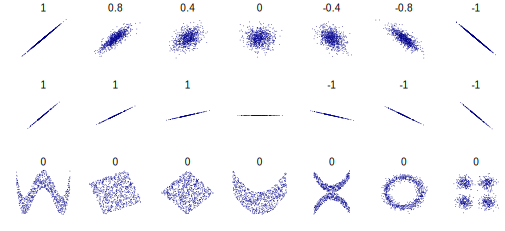

In [22]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [23]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2018-03-05,177.740005,174.520004,175.210007,176.820007,28401400.0,174.167923,NaN,NaN,NaN,NaN
2018-03-06,178.250000,176.130005,177.910004,176.669998,23788500.0,174.020172,NaN,NaN,NaN,-0.000848
2018-03-07,175.850006,174.270004,174.940002,175.029999,31703500.0,172.404770,NaN,NaN,NaN,-0.009283
2018-03-08,177.119995,175.070007,175.479996,176.940002,23774100.0,174.286118,NaN,NaN,NaN,0.010912
2018-03-09,180.000000,177.389999,177.960007,179.979996,32185200.0,177.280518,NaN,NaN,NaN,0.017181


In [24]:
tech_returns.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-03-05,NaN,NaN,NaN,NaN
2018-03-06,-0.000848,0.009208,0.003786,-0.003417
2018-03-07,-0.009283,0.004787,0.013314,0.005787
2018-03-08,0.010912,0.004440,0.014744,0.006073
2018-03-09,0.017181,0.017418,0.030231,0.022345


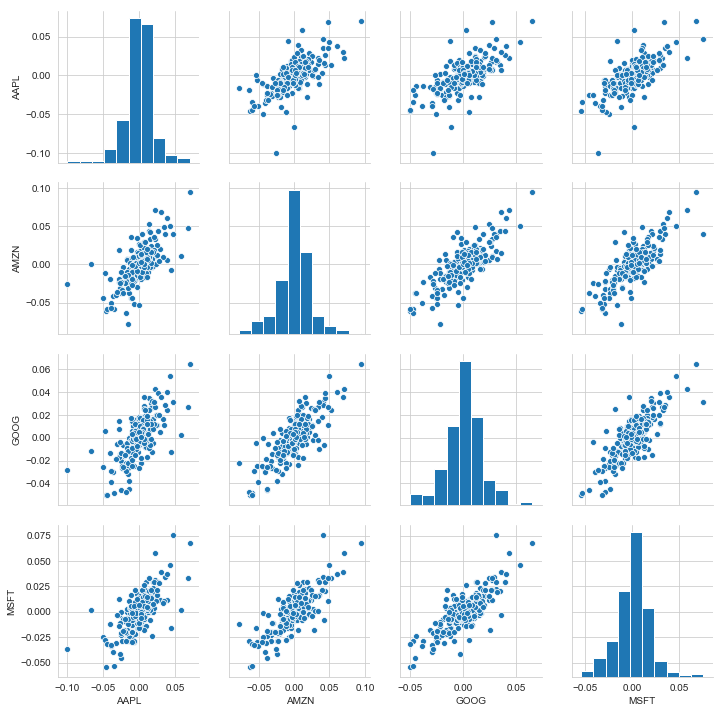

In [25]:
sns.pairplot(tech_returns.dropna())

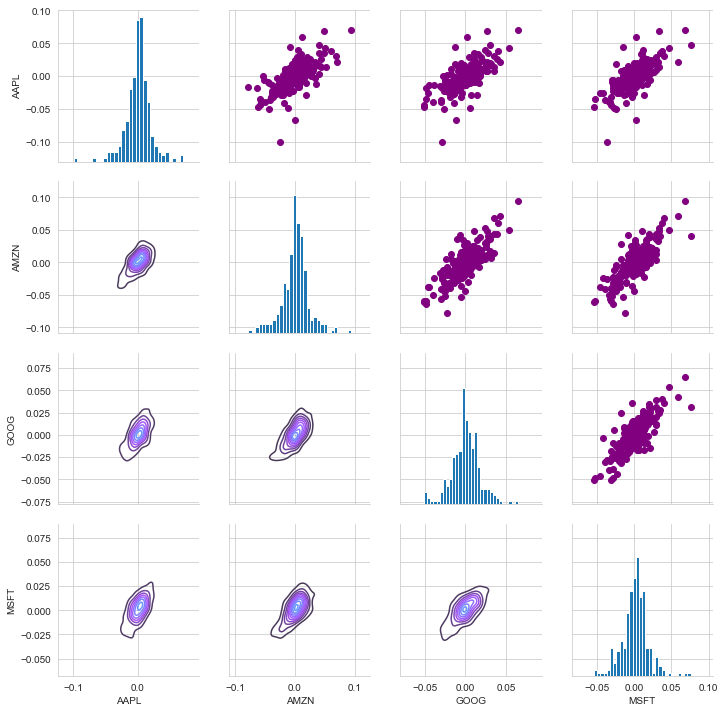

In [26]:
return_fig = sns.PairGrid(tech_returns.dropna())
return_fig.map_upper(plt.scatter,color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist,bins=30)

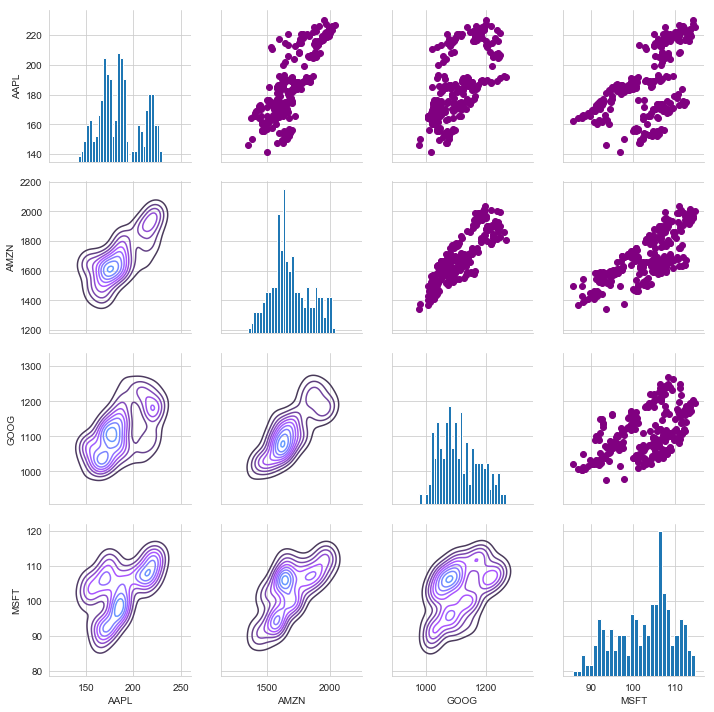

In [27]:
return_fig = sns.PairGrid(closing_df.dropna())
return_fig.map_upper(plt.scatter,color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist,bins=30)

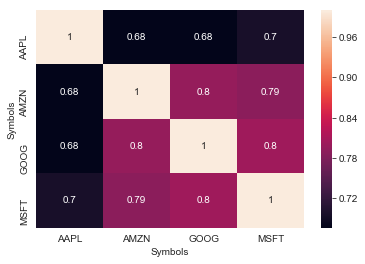

In [28]:
sns.heatmap(tech_returns.corr(),annot=True )

In [29]:
tech_returns.corr()

Symbols,AAPL,AMZN,GOOG,MSFT
Symbols,,,,
AAPL,1.000000,0.676530,0.675873,0.696826
AMZN,0.676530,1.000000,0.796812,0.789297
GOOG,0.675873,0.796812,1.000000,0.803770
MSFT,0.696826,0.789297,0.803770,1.000000


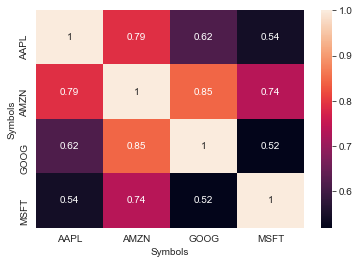

In [30]:
sns.heatmap(closing_df.corr(),annot=True)

In [31]:
# analyze the risk of stocks

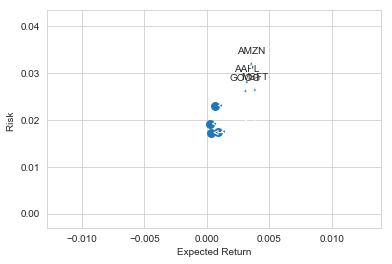

In [32]:
rets= tech_returns.dropna()
area = np.pi*20 #area of the circle

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk ')


for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext = (50,50),
    textcoords='offset points', ha='right', va='bottom',
        arrowprops = dict(arrowstyle = '<|-|>', connectionstyle = 'angle, angleA=-90,angleB=180,rad=5'))
        
        
    

In [33]:
#value at risk

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


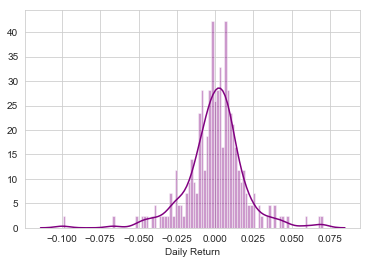

In [39]:
sns.distplot(AAPL["Daily Return"].dropna(), bins= 100,color='purple')

In [42]:
#bootstrap Method
rets['AAPL'].quantile(0.05)

-0.029930148516846986

In [43]:
rets['MSFT'].quantile(0.05)

-0.029082363415812006

In [45]:
rets['GOOG'].quantile(0.05)

-0.027744836700483166

In [46]:
rets['AMZN'].quantile(0.05)

-0.04071382574112135

#The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.
We would loosing about 4% with amazon with 95% confidence

Risk Analysis using Monte Carlo Analysis

In [50]:
days = 365
dt= 1/days
mu = rets.mean()['GOOG']
sigma= rets['GOOG'].std()

In [52]:
def stock_monte_carlo(start_price, days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x]= np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        
        drift[x]= mu*dt
        
        price[x]= price[x-1]+ (price[x-1]* (drift[x]+shock[x]))
    
    return price
        

In [54]:
GOOG.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-03-05,1097.099976,1069.000000,1075.140015,1090.930054,1202200,1090.930054
2018-03-06,1101.849976,1089.775024,1099.219971,1095.060059,1532800,1095.060059
2018-03-07,1112.219971,1085.482056,1089.189941,1109.640015,1292500,1109.640015
2018-03-08,1127.599976,1112.800049,1115.319946,1126.000000,1355100,1126.000000
2018-03-09,1160.800049,1132.461060,1136.000000,1160.040039,2128000,1160.040039


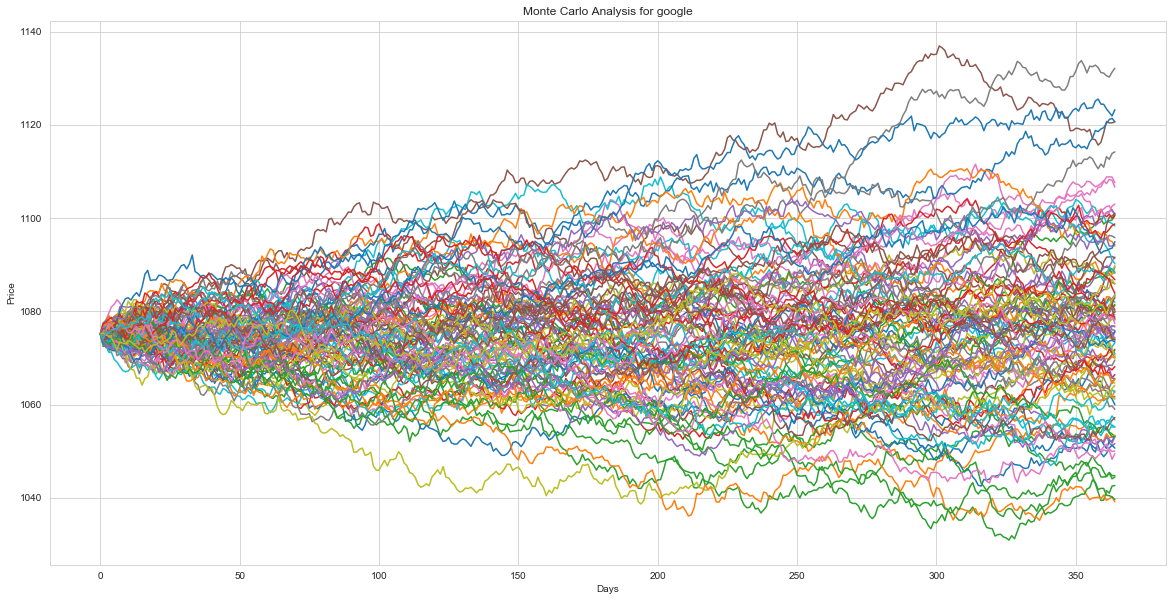

In [64]:
start_price = 1075.14

plt.figure(figsize=(20,10))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for google')

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    


In [61]:
runs = 10000

simulations =  np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

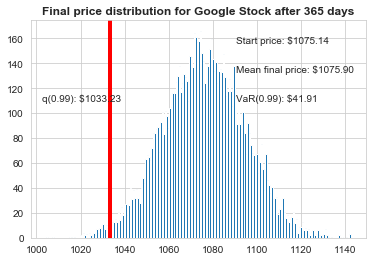

In [62]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)
# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [74]:
df = pd.DataFrame(simu)